In [43]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
file_path="C:/Users/kleop/Documents/repos/Exercises/Machine_Learning/Coursework_2/heart.csv"
data=pd.read_csv(file_path, sep=',', decimal=".")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

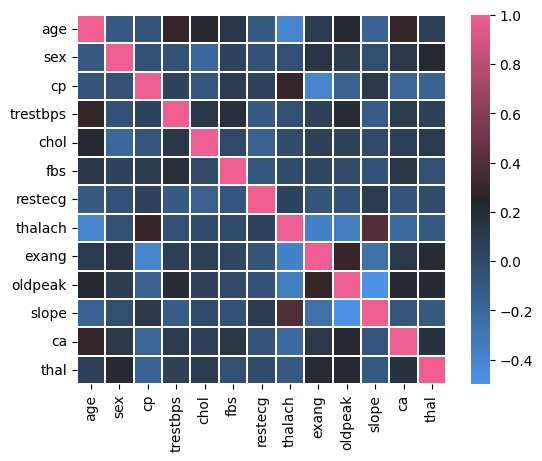

In [45]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

#data seem pretty indpendent from each other

In [46]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#print(X)
#print(y)

In [47]:
scale=StandardScaler()
X=scale.fit_transform(X)
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
# Principal Component Analysis to select k features such that they explain as much variance as possible
pca =PCA(n_components =10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_.cumsum())


[0.20879927 0.32995097 0.42369281 0.51514961 0.59630549 0.67101175
 0.73647104 0.79594704 0.85092807 0.90117182]


In [49]:
gnb = GaussianNB()
gnb.fit(X_train_pca,y_train)

GaussianNB()

In [50]:
y_pred_train = gnb.predict(X_train_pca)
y_pred_test = gnb.predict(X_test_pca)

In [51]:
# Getting the Training and Test Accuracy of the Naive Bayes Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_pred_train))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_pred_test))
print()

#Getting the confusion matrix for both training and test set
print("Confusion matrix for train: \n",metrics.confusion_matrix(y_train, y_pred_train))
print("Confusion matrix for test: \n",metrics.confusion_matrix(y_test,y_pred_test))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_pred_train))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_pred_test))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_pred_train))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_pred_test))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_pred_train))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_pred_test))
print()

Training Accuracy of the Model:  0.8388429752066116
Test Accuracy of the Model:  0.7868852459016393

Confusion matrix for train: 
 [[ 85  26]
 [ 13 118]]
Confusion matrix for test: 
 [[20  7]
 [ 6 28]]

Training Precision of the Model:  0.8194444444444444
Test Precision of the Model:  0.8

Training Recall of the Model:  0.9007633587786259
Test Recall of the Model:  0.8235294117647058

Training F1-Score of the Model:  0.858181818181818
Test F1-Score of the Model:  0.8115942028985507



Comparing the accuracy on the test set of all the 3 trained models, we conclude that the Naive Bayes Classifier gave us the lowest performance achieving an 78% accuracy. 